In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

print('Cuda Available : {}'.format(torch.cuda.is_available()))

Cuda Available : False


In [4]:
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


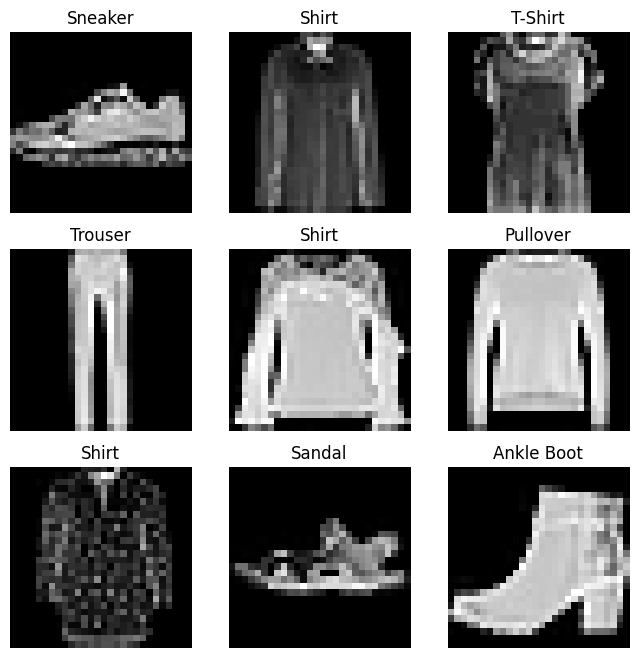

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Build a simple NN to see the perfomance.

In [12]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits




In [34]:
def train_loop(train,test,batch_size,lr,lossfn): 
    """
    Trains a neural network model using the provided training data and evaluates its performance on the test data.

    Args:
        train (Dataset): The training dataset.
        test (Dataset): The test dataset.
        batch_size (int): The number of samples per batch during training.
        lr (float): The learning rate for the optimizer.
        lossfn (callable): The loss function used to compute the training loss.

    Returns:
        float: The accuracy of the trained model on the test dataset.
    """
    nn_model = SimpleNN()
    tr_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
    ts_loader = DataLoader(test, batch_size=batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(nn_model.parameters(), lr=lr) 
    loss_fn = lossfn
    
    loss_history = []
    total_loss = 0
    size  = train.data.shape[0]
    
    epochs = range(5)
    for epoch in epochs:
        for batch, (X, y) in enumerate(tr_loader):
            # Compute prediction and loss
            
            pred = nn_model(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            avg_loss = total_loss / size
            loss_history.append(avg_loss)
        
    nn_model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for X, y in ts_loader:
            pred = nn_model(X)
            _, predicted = torch.max(pred, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [35]:
learning_rates = [0.001, 0.01,0.1,1]
results = {}
for lr in learning_rates:
    print(f'Training with learning rate: {lr}')
    accuracy = train_loop(training_data, test_data, 64, lr, nn.CrossEntropyLoss())
    results[lr] = accuracy
    print(f'Accuracy with learning rate {lr}: {accuracy}%')

print(results)

Training with learning rate: 0.001
loss: 2.277400  [    0/60000]
loss: 2.220813  [ 6400/60000]
loss: 2.176450  [12800/60000]
loss: 2.132980  [19200/60000]
loss: 2.026096  [25600/60000]
loss: 1.968190  [32000/60000]
loss: 1.947185  [38400/60000]
loss: 1.894861  [44800/60000]
loss: 1.860456  [51200/60000]
loss: 1.881181  [57600/60000]
loss: 1.795666  [    0/60000]
loss: 1.643307  [ 6400/60000]
loss: 1.615176  [12800/60000]
loss: 1.554103  [19200/60000]
loss: 1.572636  [25600/60000]
loss: 1.474469  [32000/60000]
loss: 1.462714  [38400/60000]
loss: 1.314243  [44800/60000]
loss: 1.412780  [51200/60000]
loss: 1.397329  [57600/60000]
loss: 1.395211  [    0/60000]
loss: 1.361065  [ 6400/60000]
loss: 1.377550  [12800/60000]
loss: 1.278474  [19200/60000]
loss: 1.167982  [25600/60000]
loss: 1.134069  [32000/60000]
loss: 1.064498  [38400/60000]
loss: 1.217780  [44800/60000]
loss: 1.062920  [51200/60000]
loss: 1.090485  [57600/60000]
loss: 1.081463  [    0/60000]
loss: 1.147743  [ 6400/60000]
loss:

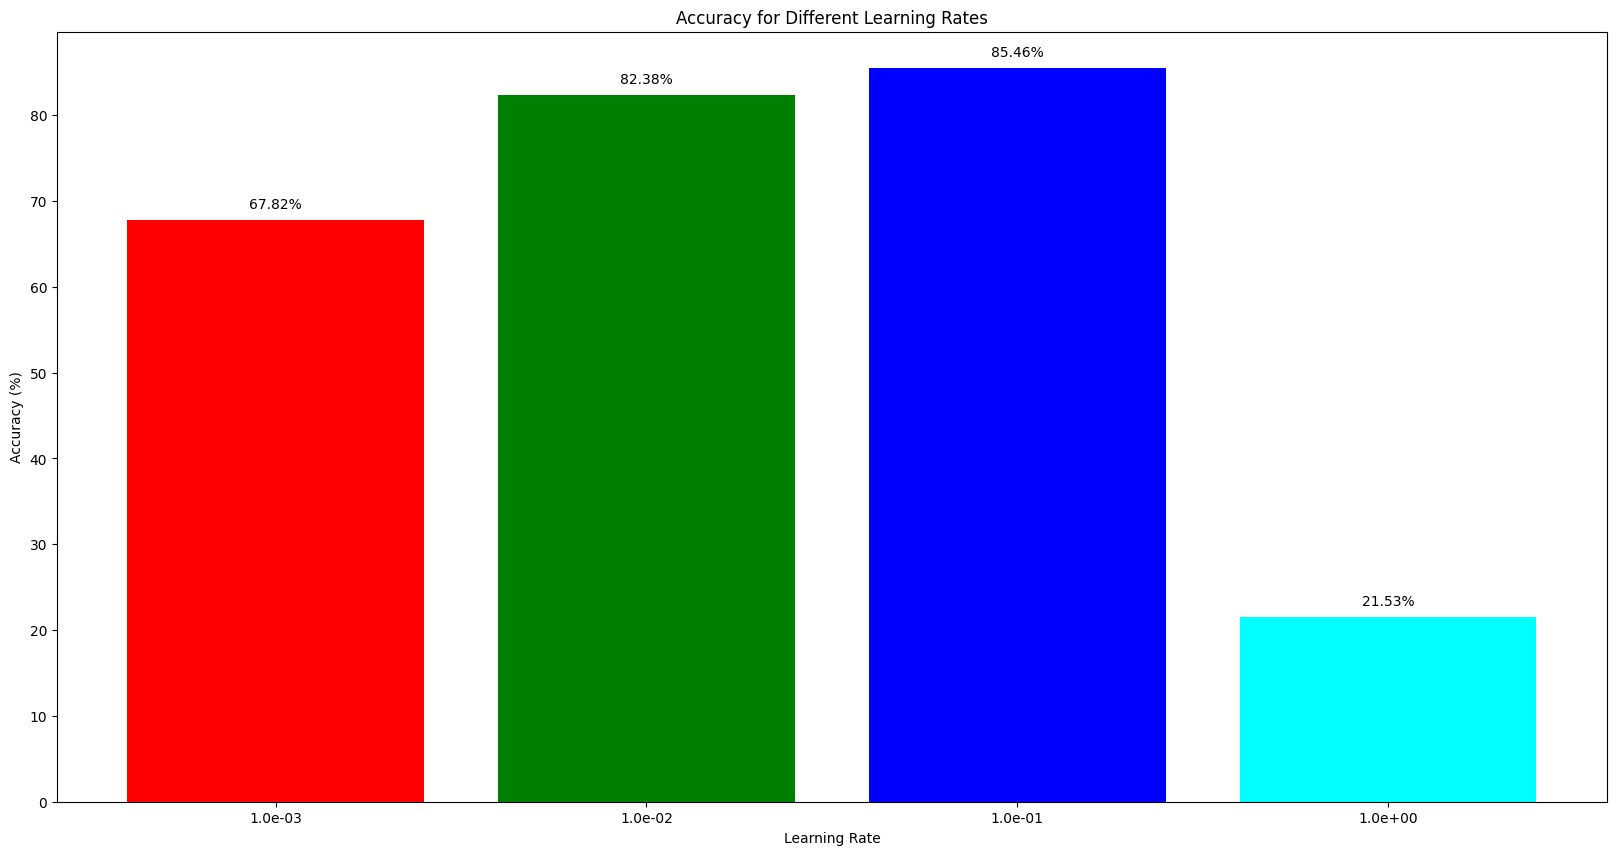

In [36]:
learning_rates = list(results.keys())
accuracies = list(results.values())

x_positions = range(len(learning_rates))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange']

colors = colors[:len(learning_rates)]

plt.figure(figsize=(20, 10))
bar_plot = plt.bar(x_positions, accuracies, color=colors)
bars = plt.bar(x_positions, accuracies, color=colors)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Learning Rates')


# 可选：为每个条形添加文本标签显示准确率
plt.xticks(x_positions, [f'{lr:.1e}' for lr in learning_rates])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, # Add a slight offset above the bar
             f'{yval:.2f}%', # Format the accuracy to two decimal places
             ha='center', va='bottom') # Align the text in the center and at the bottom of the offset
plt.show()

In [37]:
batch_size = [16,32,64]
results = {}

batch_size = [16,32,64]
results = {}
for bs in batch_size:
    print(f'Training with learning rate: {bs}')
    accuracy = train_loop(training_data, test_data, bs, 0.01, nn.CrossEntropyLoss())
    results[bs] = accuracy
    print(f'Accuracy with batchsize {bs}: {accuracy}%')

print(results)

Training with learning rate: 16
loss: 2.331000  [    0/60000]
loss: 1.775095  [ 1600/60000]
loss: 1.359048  [ 3200/60000]
loss: 1.091957  [ 4800/60000]
loss: 0.879233  [ 6400/60000]
loss: 0.562070  [ 8000/60000]
loss: 0.822171  [ 9600/60000]
loss: 0.818885  [11200/60000]
loss: 0.825601  [12800/60000]
loss: 0.626199  [14400/60000]
loss: 0.522646  [16000/60000]
loss: 0.691148  [17600/60000]
loss: 0.901620  [19200/60000]
loss: 0.784585  [20800/60000]
loss: 0.573417  [22400/60000]
loss: 0.683168  [24000/60000]
loss: 0.432642  [25600/60000]
loss: 0.356787  [27200/60000]
loss: 0.661688  [28800/60000]
loss: 0.563753  [30400/60000]
loss: 0.539176  [32000/60000]
loss: 0.570514  [33600/60000]
loss: 0.612635  [35200/60000]
loss: 0.416248  [36800/60000]
loss: 0.375627  [38400/60000]
loss: 0.862011  [40000/60000]
loss: 0.588620  [41600/60000]
loss: 0.498839  [43200/60000]
loss: 0.426975  [44800/60000]
loss: 0.351384  [46400/60000]
loss: 0.285445  [48000/60000]
loss: 0.366143  [49600/60000]
loss: 0.

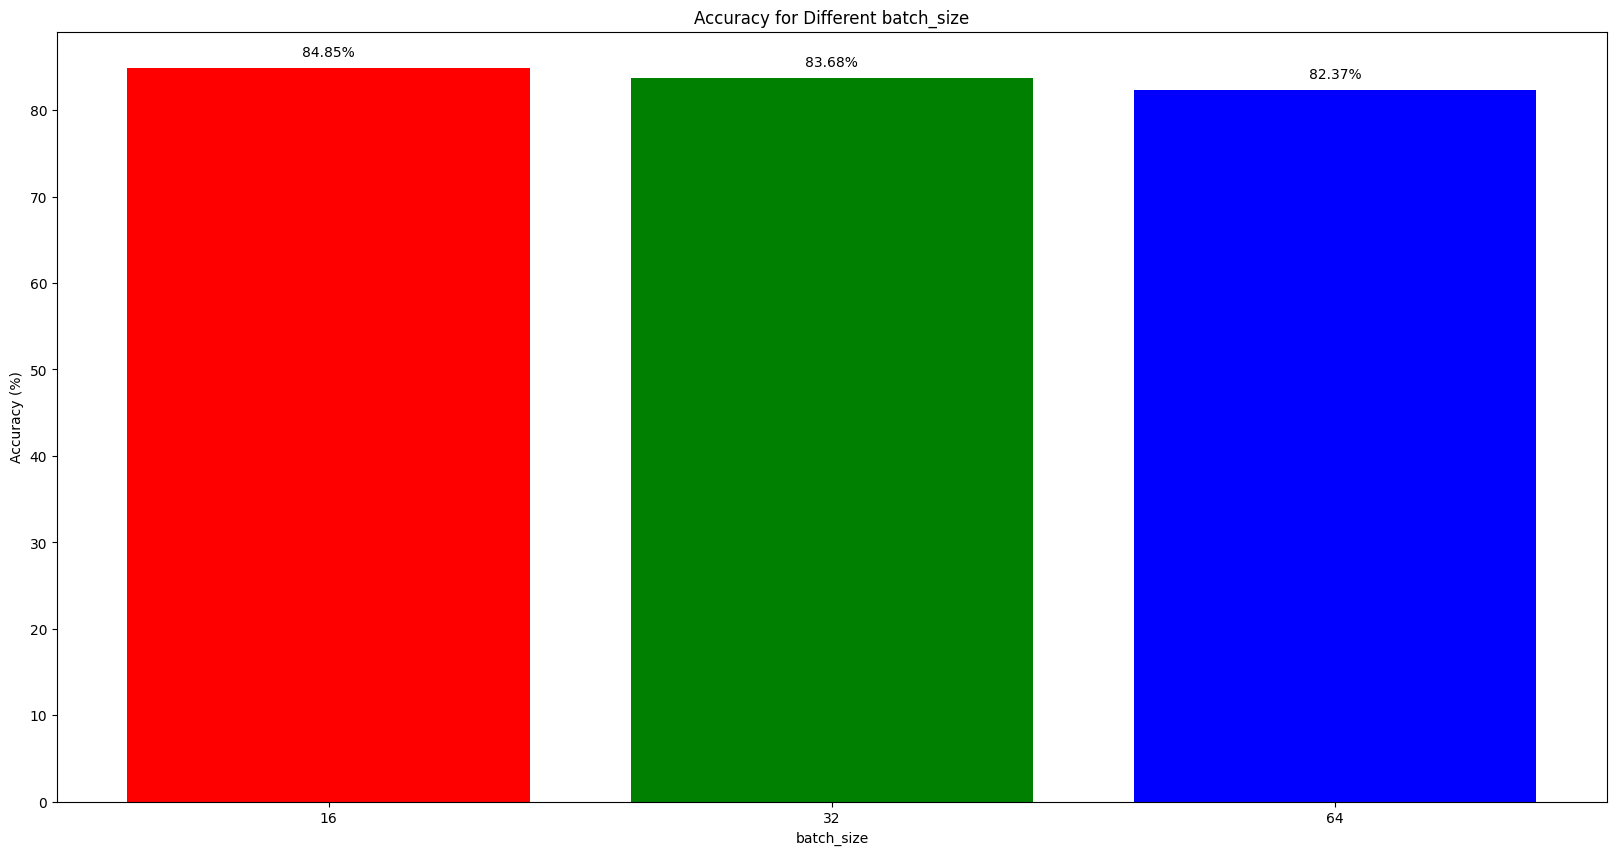

In [40]:
batch_size = list(results.keys())
accuracies = list(results.values())

x_positions = range(len(batch_size))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange']

colors = colors[:len(batch_size)]

plt.figure(figsize=(20, 10))

bars = plt.bar(x_positions, accuracies, color=colors)

plt.xlabel('batch_size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different batch_size')


# 可选：为每个条形添加文本标签显示准确率
plt.xticks(x_positions, [f'{bs}' for bs in batch_size])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, # Add a slight offset above the bar
             f'{yval:.2f}%', # Format the accuracy to two decimal places
             ha='center', va='bottom') # Align the text in the center and at the bottom of the offset
plt.show()

In [11]:

import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    """A convolutional neural network model for classifying garments.

    This class defines the architecture of the garment classifier model. It consists of multiple
    convolutional layers followed by fully connected layers.

    Args:
        nn (module): The base class for all neural network modules in PyTorch.
    """
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


conv_model = GarmentClassifier()

In [44]:
def train2_loop(train,test,batch_size,lr,lossfn): 
    """
    Trains a neural network model using the provided training data and evaluates its performance on the test data.

    Parameters:
    - train (Dataset): The training dataset.
    - test (Dataset): The test dataset.
    - batch_size (int): The batch size for training.
    - lr (float): The learning rate for the optimizer.
    - lossfn (loss function): The loss function to be used for training.

    Returns:
    - accuracy (float): The accuracy of the trained model on the test data.
    """  
    nn_model = GarmentClassifier()
    tr_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
    ts_loader = DataLoader(test, batch_size=batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(nn_model.parameters(), lr=lr) 
    loss_fn = lossfn
    
    loss_history = []
    total_loss = 0
    size  = train.data.shape[0]
    print(size)
    epochs = range(5)
    for epoch in epochs:
        for batch, (X, y) in enumerate(tr_loader):
            # Compute prediction and loss
            
            pred = nn_model(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            avg_loss = total_loss / size
            loss_history.append(avg_loss)
        
    nn_model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for X, y in ts_loader:
            pred = nn_model(X)
            _, predicted = torch.max(pred, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [45]:
learning_rates = [0.001, 0.01,0.1,1]
results = {}
for lr in learning_rates:
    print(f'Training with learning rate: {lr}')
    accuracy = train2_loop(training_data, test_data, 64, lr, nn.CrossEntropyLoss())
    results[lr] = accuracy
    print(f'Accuracy with learning rate {lr}: {accuracy}%')

print(results)

Training with learning rate: 0.001
60000
loss: 2.316984  [    0/60000]
loss: 2.304928  [ 6400/60000]
loss: 2.300330  [12800/60000]
loss: 2.301348  [19200/60000]
loss: 2.294434  [25600/60000]
loss: 2.324216  [32000/60000]
loss: 2.310772  [38400/60000]
loss: 2.300056  [44800/60000]
loss: 2.296525  [51200/60000]
loss: 2.307508  [57600/60000]
loss: 2.306555  [    0/60000]
loss: 2.294244  [ 6400/60000]
loss: 2.295057  [12800/60000]
loss: 2.300830  [19200/60000]
loss: 2.297750  [25600/60000]
loss: 2.308071  [32000/60000]
loss: 2.306438  [38400/60000]
loss: 2.301278  [44800/60000]
loss: 2.298512  [51200/60000]
loss: 2.304843  [57600/60000]
loss: 2.307555  [    0/60000]
loss: 2.303533  [ 6400/60000]
loss: 2.310758  [12800/60000]
loss: 2.292625  [19200/60000]
loss: 2.297665  [25600/60000]
loss: 2.304991  [32000/60000]
loss: 2.304151  [38400/60000]
loss: 2.300959  [44800/60000]
loss: 2.299083  [51200/60000]
loss: 2.285608  [57600/60000]
loss: 2.296681  [    0/60000]
loss: 2.297138  [ 6400/60000]

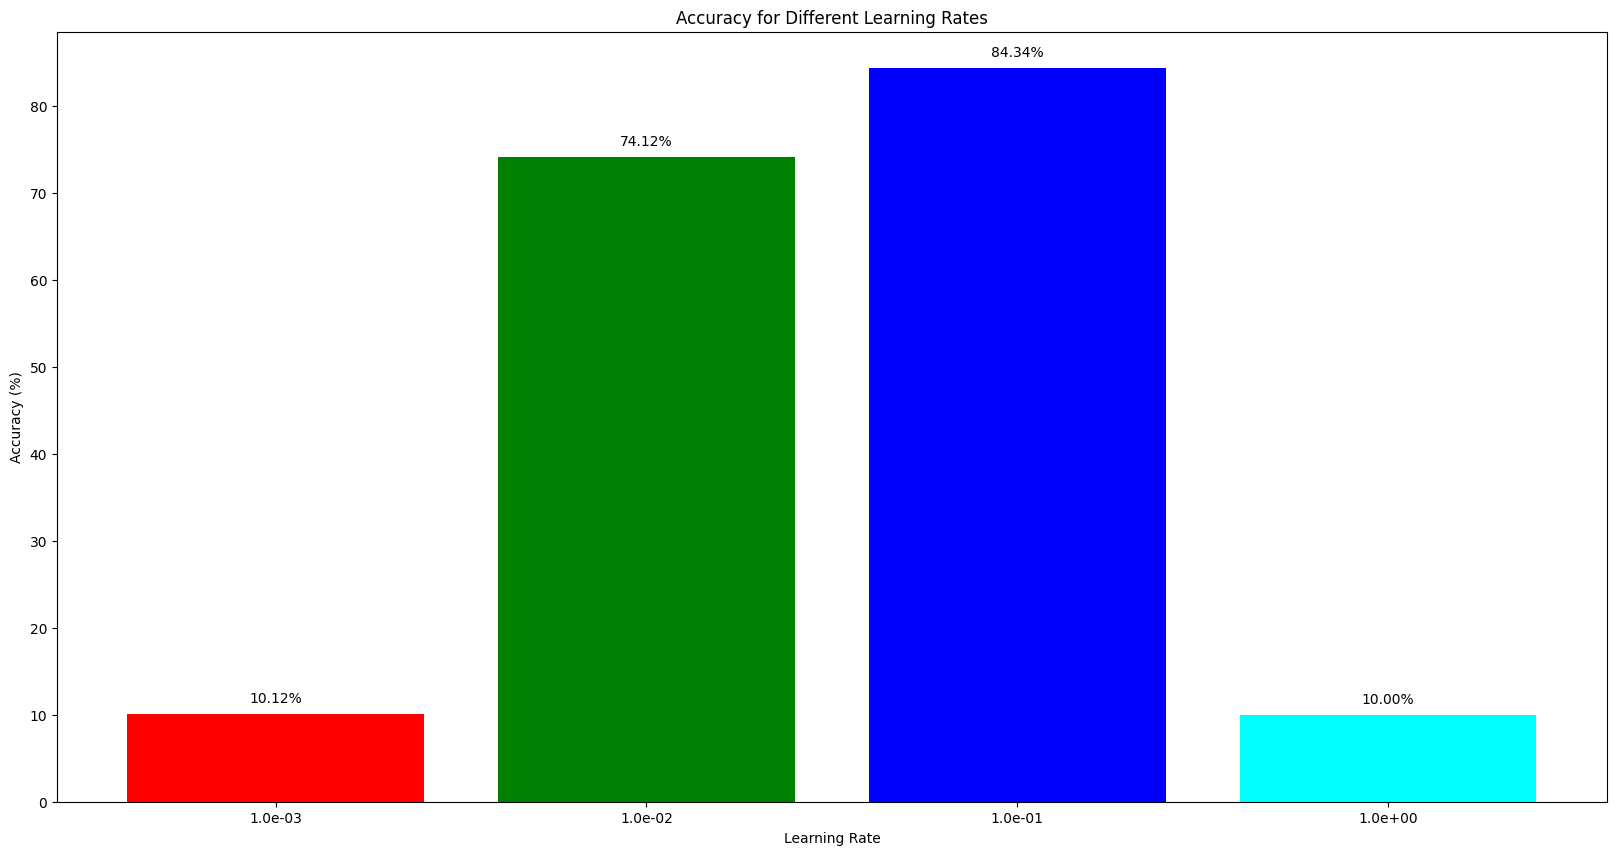

In [46]:
learning_rates = list(results.keys())
accuracies = list(results.values())

x_positions = range(len(learning_rates))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange']

colors = colors[:len(learning_rates)]

plt.figure(figsize=(20, 10))
bar_plot = plt.bar(x_positions, accuracies, color=colors)
bars = plt.bar(x_positions, accuracies, color=colors)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Learning Rates')


# 可选：为每个条形添加文本标签显示准确率
plt.xticks(x_positions, [f'{lr:.1e}' for lr in learning_rates])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, # Add a slight offset above the bar
             f'{yval:.2f}%', # Format the accuracy to two decimal places
             ha='center', va='bottom') # Align the text in the center and at the bottom of the offset
plt.show()

In [47]:
batch_size = [16,32,64]
results = {}

batch_size = [16,32,64]
results = {}
for bs in batch_size:
    print(f'Training with learning rate: {bs}')
    accuracy = train2_loop(training_data, test_data, bs, 0.01, nn.CrossEntropyLoss())
    results[bs] = accuracy
    print(f'Accuracy with batchsize {bs}: {accuracy}%')

print(results)

Training with learning rate: 16
60000
loss: 2.311897  [    0/60000]
loss: 2.305780  [ 1600/60000]
loss: 2.296957  [ 3200/60000]
loss: 2.296082  [ 4800/60000]
loss: 2.280467  [ 6400/60000]
loss: 2.303708  [ 8000/60000]
loss: 2.282973  [ 9600/60000]
loss: 2.259980  [11200/60000]
loss: 2.175803  [12800/60000]
loss: 1.876485  [14400/60000]
loss: 1.282917  [16000/60000]
loss: 1.146726  [17600/60000]
loss: 1.025726  [19200/60000]
loss: 0.958635  [20800/60000]
loss: 0.971373  [22400/60000]
loss: 1.103705  [24000/60000]
loss: 0.603463  [25600/60000]
loss: 1.559510  [27200/60000]
loss: 1.132571  [28800/60000]
loss: 1.551567  [30400/60000]
loss: 0.860426  [32000/60000]
loss: 0.527779  [33600/60000]
loss: 0.375251  [35200/60000]
loss: 0.474795  [36800/60000]
loss: 0.719341  [38400/60000]
loss: 0.749420  [40000/60000]
loss: 1.134071  [41600/60000]
loss: 0.502833  [43200/60000]
loss: 0.700994  [44800/60000]
loss: 1.635495  [46400/60000]
loss: 0.738757  [48000/60000]
loss: 0.402591  [49600/60000]
lo

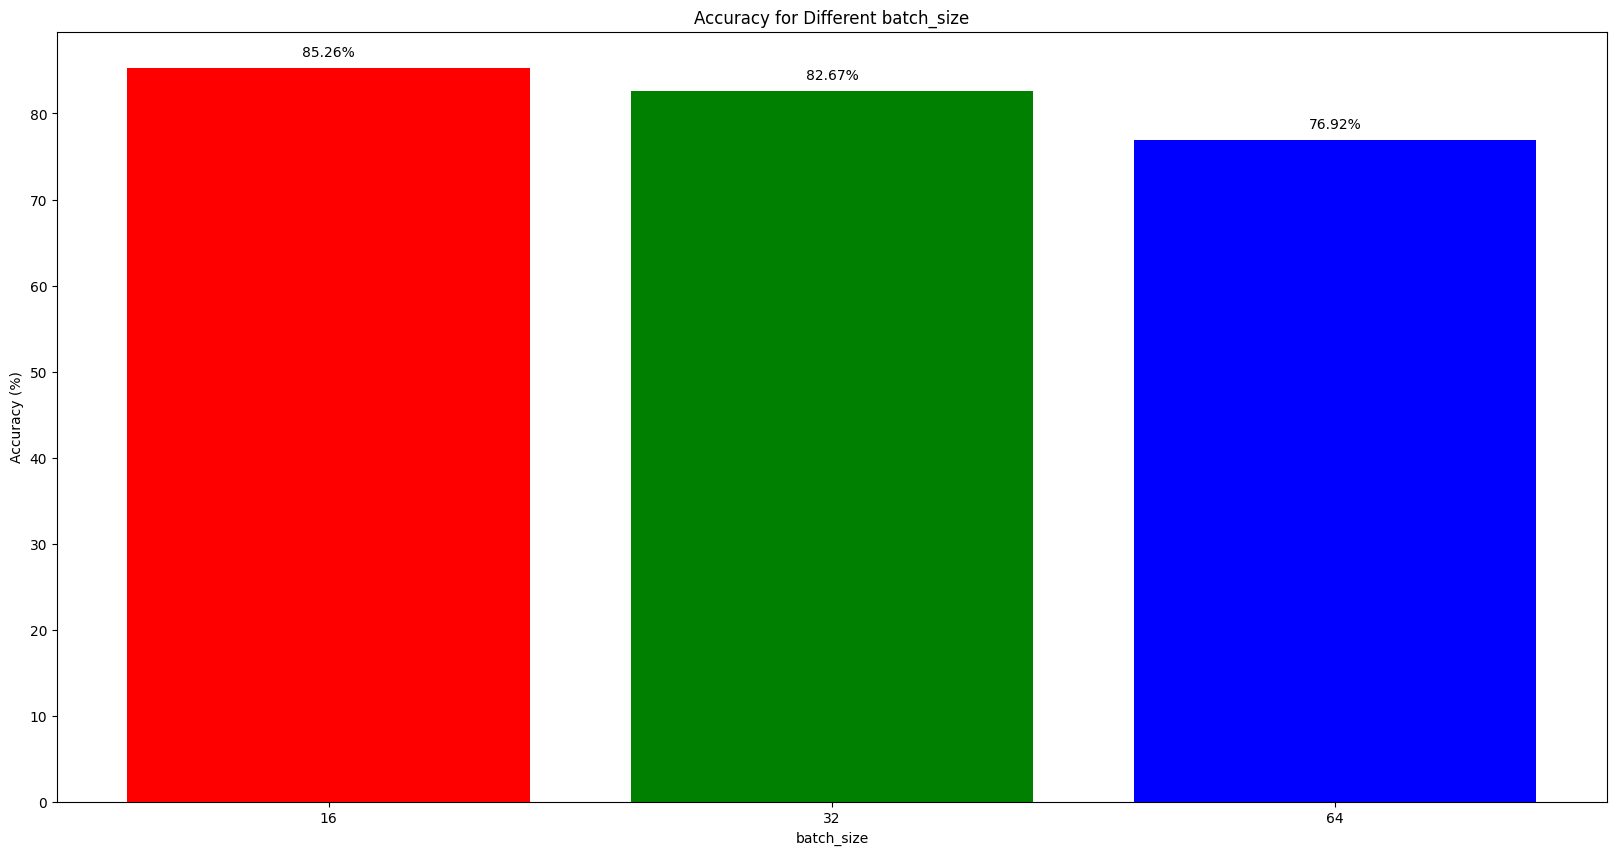

In [48]:
batch_size = list(results.keys())
accuracies = list(results.values())

x_positions = range(len(batch_size))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange']

colors = colors[:len(batch_size)]

plt.figure(figsize=(20, 10))

bars = plt.bar(x_positions, accuracies, color=colors)

plt.xlabel('batch_size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different batch_size')


# 可选：为每个条形添加文本标签显示准确率
plt.xticks(x_positions, [f'{bs}' for bs in batch_size])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, # Add a slight offset above the bar
             f'{yval:.2f}%', # Format the accuracy to two decimal places
             ha='center', va='bottom') # Align the text in the center and at the bottom of the offset
plt.show()